In [1]:
import sklearn 
import numpy as np
np.random.seed(0)

import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

We are using the image dataset MNIST, which comprises images of handwritten digits. We use sklearn to fetch the dataset from openml.

In [2]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml("mnist_784",
                   return_X_y=True)

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Convert data to image pixel-by-pixel representation
X_images = X.to_numpy().reshape(X.shape[0], 28, 28)

# Flatten the data so that we can apply clustering
X = X_images.reshape(X.shape[0], -1)

# Showing the Images (Digits)

In the following, we display each of the digits in the data. First, we have to convert the data for the visualization. So, we transform the dataset back to its original shape of 70000x28x28, where each image has 28x28 pixels.

However, note that to apply clustering, we have to use the "flattened" format with 784 features because we cannot apply clustering to datasets with more than two dimensions.

In [5]:
y = y.astype(int).to_numpy()

In [6]:
X.shape

(70000, 784)

In [7]:
# Transform the data to original "image format"
X_images = X.reshape(X.shape[0], 28, 28)
X_images.shape

(70000, 28, 28)

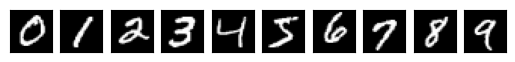

In [8]:
n_digits = 10
fig, axes = plt.subplots(1,n_digits)
for i in range(n_digits):
    
    #get indices of digit i
    digit_i_idx = np.where(y==i)

    # get images for this digit label
    digit_images = X_images[digit_i_idx]
    
    # get an example image for this digit
    image = digit_images[0]
    
    # Display the image of the digit
    axes[i].imshow(image, 
              cmap='grey')
    
    # Styling: Turn of x/y axis ticks
    axes[i].set_yticks([])
    axes[i].set_xticks([])

In [9]:
fig.savefig("figures/digits.png", bbox_inches='tight')

# Applying k-Means

In the following, we apply k-Means to the dataset. We use the implementation of sklearn. Further, we evaluate the results by comparing them to the ground-truth clustering results with external validity indices.

In [10]:
from sklearn.cluster import KMeans

# Instantiate k-Means object
kmeans = KMeans(n_clusters=n_digits,
                random_state=1234)

# Apply k-Means to the dataset to get a list of cluster labels
cluster_labels = kmeans.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

In [11]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

ami_score = adjusted_mutual_info_score(cluster_labels, y)
ari_score = adjusted_rand_score(cluster_labels, y)

print(f"Adjusted Mutual Information (AMI) Score: {np.round(ami_score * 100, 2)}")
print(f"Adjusted Rand Index (ARI) Score: {np.round(ari_score * 100, 2)}")

Adjusted Mutual Information (AMI) Score: 49.98
Adjusted Rand Index (ARI) Score: 36.67


# Plot Synthetic Cluster Centers

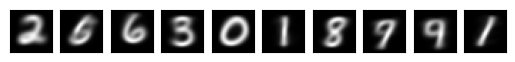

In [12]:
fig, axes = plt.subplots(1,n_clusters)
n_clusters = len(np.unique(cluster_labels))

for c_i in range(n_clusters):

    # get center for cluster c_i and reshape it for plotting
    image = kmeans.cluster_centers_[c_i].reshape(28,28)

    # plot the cluster centers
    axes[c_i].imshow(image, 
              cmap='grey')

    # Styling: Turn off x/y ticks
    axes[c_i].set_yticks([])
    axes[c_i].set_xticks([])
fig.savefig("figures/cluster_centers.png", bbox_inches='tight')

# Show Digits that are closest to the Cluster Centers

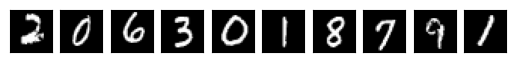

In [13]:
from sklearn.metrics import pairwise_distances_argmin

fig, axes = plt.subplots(1, n_clusters)

# Use sklearn function to calculate the nearest data instance 
# for each cluster center. The function returns the indices of 
# the nearest instances.
nearest_instances_idx = pairwise_distances_argmin(kmeans.cluster_centers_, 
                                                  X)

for c_i in range(n_clusters):

    # get the image that is the nearest instance to cluster center c_i
    image = X_images[nearest_instances_idx[c_i]]

    # Plot the images
    axes[c_i].imshow(image, 
              cmap='grey')

    # Styling
    axes[c_i].set_yticks([])
    axes[c_i].set_xticks([])

fig.savefig("figures/nearest_data_instances.png", bbox_inches='tight')